In [1]:
import pandas as pd
from matplotlib import pyplot as plt
# Processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Pipelining
from sklearn.pipeline import make_pipeline
# Metrics
from sklearn.metrics import mean_squared_error, confusion_matrix
# Regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# Keras Tuner
import keras_tuner as kt

In [2]:
RANDOM_STATE = 42

## Loading Data & Preprocessing

In [3]:
# Read CSV
df = pd.read_csv("housePrice.csv")

In [4]:
# Remove null rows
df.dropna(
    inplace=True,
    how="any",
)

## Categorical data

In [5]:
# Find Quantiles
q1 = df["Price"].quantile(0.25)
q2 = df["Price"].quantile(0.50)
q3 = df["Price"].quantile(0.75)
print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}")

# Create new columnd "priceLevel" with the given mapping
df["priceLevel"] = df["Price"].apply(
    lambda x: "cheap" if x <= q1 else "underMean" if x <= q2 else "aboveMean" if x <= q3 else "expensive"
)

df.head(5)  # Preview

Q1: 1419250000.0, Q2: 2900000000.0, Q3: 6000000000.0


,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,True,True,True,Shahran,1850000000,underMean
1,60,1,True,True,True,Shahran,1850000000,underMean
2,79,2,True,True,True,Pardis,550000000,cheap
3,95,2,True,True,True,Shahrake Qods,902500000,cheap
4,123,2,True,True,True,Shahrake Gharb,7000000000,expensive


## Label Encoding

In [6]:
# Label encode the categorical columns
for col in ["Parking", "Warehouse", "Elevator", "Address"]:
    df[col] = LabelEncoder().fit_transform(df[col])

df.head(5)  # Preview

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,63,1,1,1,1,156,1850000000,underMean
1,60,1,1,1,1,156,1850000000,underMean
2,79,2,1,1,1,117,550000000,cheap
3,95,2,1,1,1,152,902500000,cheap
4,123,2,1,1,1,150,7000000000,expensive


### Normalize

In [7]:
# Normalize features "Area", "Room", "Parking", "Warehouse", "Elevator", "Address"
def normalize(x):
    return (x - x.mean()) / x.std()

for col in ["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]:
    df[col] = normalize(df[col])

df.head(5)  # Preview

# NOTE: Normally we don't normalize categorical features, but for the sake of this exercise we will do it anyway! (question says so)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,priceLevel
0,-0.631442,-1.422174,0.424074,0.304603,0.519331,1.013505,1850000000,underMean
1,-0.674576,-1.422174,0.424074,0.304603,0.519331,1.013505,1850000000,underMean
2,-0.401395,-0.106758,0.424074,0.304603,0.519331,0.238489,550000000,cheap
3,-0.171348,-0.106758,0.424074,0.304603,0.519331,0.934016,902500000,cheap
4,0.231235,-0.106758,0.424074,0.304603,0.519331,0.894272,7000000000,expensive


## Regression

In [8]:
metrics = []

### Train Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]],
    df["Price"],
    test_size=0.2,
    random_state=RANDOM_STATE
)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (2760, 6), X_test: (690, 6), y_train: (2760,), y_test: (690,)


### Linear Regression

In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate
acc = linear_model.score(X_test, y_test)
mse = mean_squared_error(y_test, linear_model.predict(X_test))
metrics.append({"model": "Linear Regression", "acc": acc, "mse": mse})
print(f"Accuracy: {acc}, MSE: {mse}")

Accuracy: 0.532239397397647, MSE: 3.5389215521928864e+19


### Second Degree Polynomial Regression

In [11]:
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Evaluate
acc = polyreg.score(X_test, y_test)
mse = mean_squared_error(y_test, polyreg.predict(X_test))
metrics.append({"model": f"Polynomial Regression (degree={degree})", "acc": acc, "mse": mse})
print(f"Accuracy: {acc}, MSE: {mse}")

Accuracy: 0.7219396478541105, MSE: 2.1037123852347335e+19


### Third Degree Polynomial Regression

In [12]:
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Evaluate
acc = polyreg.score(X_test, y_test)
mse = mean_squared_error(y_test, polyreg.predict(X_test))
metrics.append({"model": f"Polynomial Regression (degree={degree})", "acc": acc, "mse": mse})
print(f"Accuracy: {acc}, MSE: {mse}")

Accuracy: 0.7261379675907262, MSE: 2.071949290788028e+19


In [13]:
pd.DataFrame(metrics)

,model,acc,mse
0,Linear Regression,0.532239,3.538922e+19
1,Polynomial Regression (degree=2),0.721940,2.103712e+19
2,Polynomial Regression (degree=3),0.726138,2.071949e+19


As can be seen here, the third degree polynomial regression model is the best fit for the data with lower MSE and higher Accuracy.

## Classification

In [14]:
metrics = []

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]],
    df["priceLevel"],
    test_size=0.2,
    random_state=RANDOM_STATE
)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (2760, 6), X_test: (690, 6), y_train: (2760,), y_test: (690,)


### Decision Tree

In [16]:
dtc = DecisionTreeClassifier(random_state=RANDOM_STATE, criterion="entropy")
dtc.fit(X_train, y_train)

# Evaluate
acc = dtc.score(X_test, y_test)
metrics.append({"model": "Decision Tree Classifier", "acc": acc})
print(f"Accuracy: {acc}")

Accuracy: 0.7565217391304347


### Random Forest

In [17]:
rfc = RandomForestClassifier(random_state=RANDOM_STATE, criterion="entropy")
rfc.fit(X_train, y_train)

# Evaluate
acc = rfc.score(X_test, y_test)
metrics.append({"model": "Random Forest Classifier", "acc": acc})
print(f"Accuracy: {acc}")

Accuracy: 0.744927536231884


### KNN

In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate
acc = knn.score(X_test, y_test)
metrics.append({"model": "KNN-3 Classifier", "acc": acc})
print(f"Accuracy: {acc}")

Accuracy: 0.7014492753623188


### SVM

In [19]:
svc = SVC(random_state=RANDOM_STATE)
svc.fit(X_train, y_train)

# Evaluate
acc = svc.score(X_test, y_test)
metrics.append({"model": "Support Vector Classifier", "acc": acc})
print(f"Accuracy: {acc}")

Accuracy: 0.6405797101449275


### Linear SVM

In [20]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc.fit(X_train, y_train)

# Evaluate
acc = svc.score(X_test, y_test)
metrics.append({"model": "Support Vector Classifier", "acc": acc})
print(f"Accuracy: {acc}")

Accuracy: 0.5753623188405798


d:\Workspace\github\AUT-CE-DM\HWs\HW2\venv\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
pd.DataFrame(metrics)

,model,acc
0,Decision Tree Classifier,0.756522
1,Random Forest Classifier,0.744928
2,KNN-3 Classifier,0.701449
3,Support Vector Classifier,0.640580
4,Support Vector Classifier,0.575362


As can be seen here, the Decision Tree model is the best fit for the data with higher Accuracy. Also, the Random Forest model is the best fit for the data with the right hyperparameters.

## Deep Learning

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["Area", "Room", "Parking", "Warehouse", "Elevator", "Address"]],
    df["priceLevel"],
    test_size=0.2,
    random_state=RANDOM_STATE
)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (2760, 6), X_test: (690, 6), y_train: (2760,), y_test: (690,)


In [23]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [32]:
# Network
model = Sequential()
model.add(Dense(32, activation='leaky_relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='leaky_relu'))
model.add(Dense(4, activation='leaky_relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Build
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
model.summary()

# Callbacks
callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=3)
]

# Trains
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=8,
    validation_split=0.2,
    callbacks=callbacks
)

# Predict
y_pred = model.predict(X_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                224       
                                                                 
 dense_9 (Dense)             (None, 8)                 264       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
276/276 [==============================] - 1s 2ms/step - loss: 1.1823 - accuracy: 0.4783 - val_loss: 1.0761 - val_accuracy: 0.5290 - lr: 0.0010
Epoch 2/20
276/276 [=============

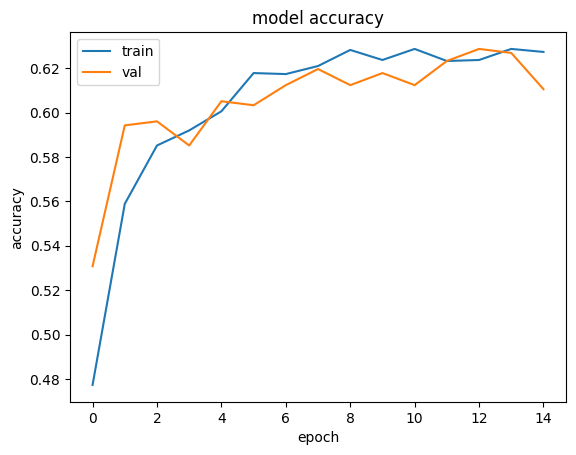

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [48]:
confusion_matrix(y_test.to_numpy().argmax(axis=1), y_pred.argmax(axis=1))

array([[112,   6,  35,  18],
       [ 48,  67,   5,  44],
       [ 36,   2, 147,   0],
       [ 33,  13,  12, 112]], dtype=int64)